In [1]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

In [2]:
s = corpus.parse('bach/bwv65.2.xml')

s.analyze('key')
s.show('midi')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [3]:
us = environment.UserSettings()
#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
%load_ext music21.ipython21

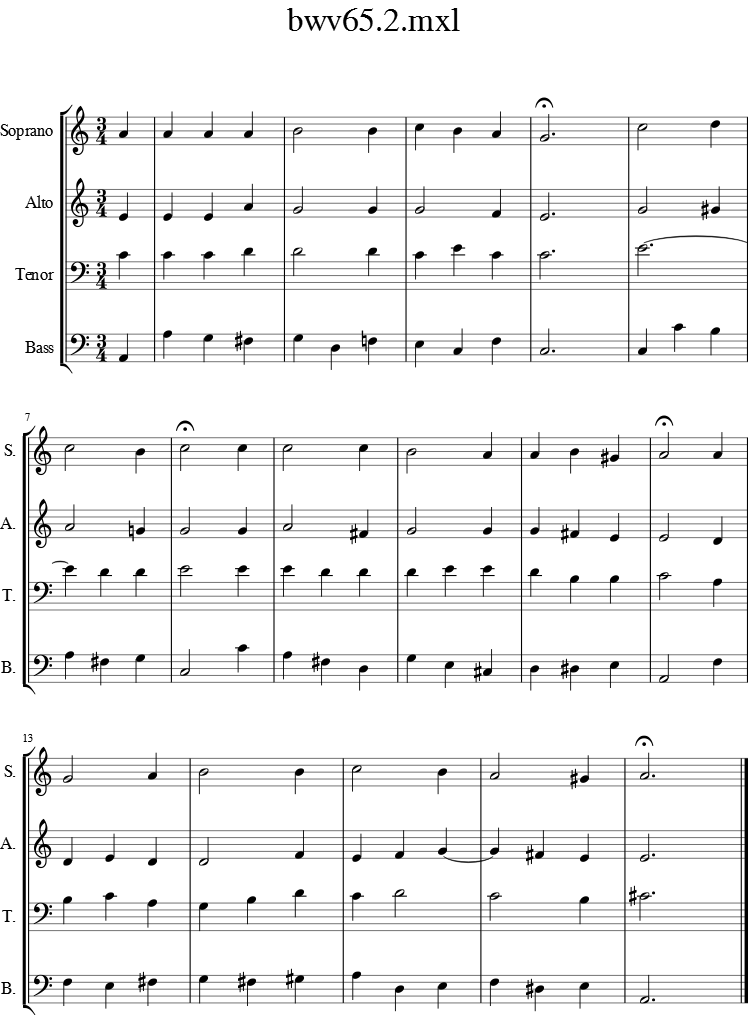

In [4]:
s.show()

score sは４つのPartから構成される（上記の例だと楽器ごとにひとつずつPartがある）

In [5]:
[type(x) for x in s.getElementsByClass(stream.Stream)] #a lot of "Part"s

[music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part]

Partはmeasure(小節)から成る
unlike the deepjazz example, each Parts consists of "Measure"s

In [6]:
[[type(y) for y in x.getElementsByClass(stream.Stream)] for x in s.getElementsByClass(stream.Stream)]

[[music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure],
 [music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure],
 [music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.stream.Measure,
  music21.

In [7]:
s2 = [(x) for x  in s.flat.getElementsByClass(note.Note)]#example of how to flatten the scoreb

In [8]:
print(type(s2))#score

<class 'list'>


scoreとPartとMeasureがstreamの基本的なsubclass

scoreがpartを複数含み、partはmeasureを複数持つ

In [9]:
s_parts = [x for x in s.parts]
measures = [x for x in s_parts[0].getElementsByClass(stream.Measure)]
type(measures[0])

music21.stream.Measure

insert works as expected if it is "Note to Stream"

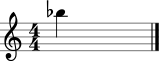

In [60]:
st1=stream.Stream()
st1.insert(0,note.Note("B-5"))
st1.show()

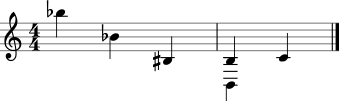

In [61]:
st1.insert(1,note.Note("B-4"))
st1.insert(2,note.Note("B#3"))
st1.insert(4 , note.Note("B3"))
st1.insert(4 , note.Note("B2"))
st1.insert(5 , note.Note("C4"))
st1.show()

C4をMajor 3rd(長三度)だけシフトした音すなわちE4を追加

In [62]:
st1.insert(6 , note.Note("C4").transpose("M3"))

C4をdouble diminished 6th（重減６度？）だけシフトした音を追加

http://guitarchord-lab.com/theory/interval.html


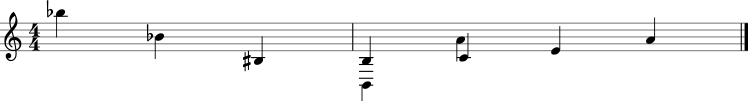

In [64]:
st1.insert(7 , note.Note("C4").transpose("dd6"))
st1.show()

appendは最後に追加してくれるので位置の指定をしなくてよくて便利

In [ ]:
st1.append(note.Note("C4"))
st1.show()

offsetの範囲を調べるには以下のようにすればいいだろう（？）

In [83]:
max_offset = max([x.offset for x in st1])
print(max_offset)

11.0


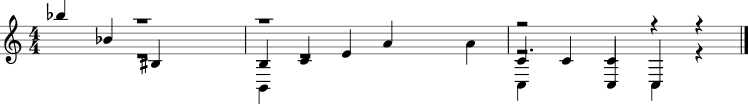

In [82]:
st1.insert(max_offset + 1 , note.Note("C3"))
st1.show()


In [10]:
p = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")

In [23]:
s2 = stream.Stream()
s2.insert(0  , p)#adding part, first argument should be offset??

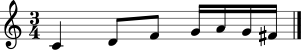

In [15]:
s2.show()

In [24]:
q=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(100,q)

## 

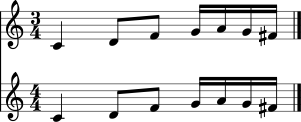

In [25]:
s2.show()

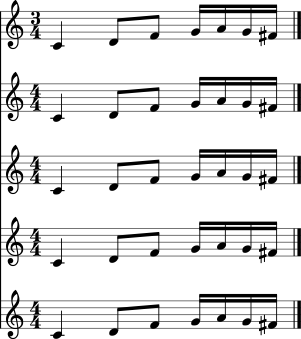

In [28]:
r=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(10,r)
s2.show()

In [29]:
s2.insert?